In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
# sql = """
# create table lei (
#     date date,
#     usa_LEI float
# )
# """

# cur = remote.cursor()
# cur.execute(sql)

# remote.close()

In [4]:
import pandas as pd

In [5]:
interest_rate_addr = "../data/OECD 경기선행지수.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,D")

df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"usa_lei"},
                   inplace=True)

df.set_index(df.columns[0], inplace=True)
df.head()

,usa_lei
date,
1955-01,101.4571
1955-02,101.8151
1955-03,102.1115
1955-04,102.3199
1955-05,102.4403


In [6]:
# df.loc["20190901":]
corona_interval = df["2004-09":]
corona_interval.head()

,usa_lei
date,
2004-09,100.6768
2004-10,100.6047
2004-11,100.5752
2004-12,100.5613
2005-01,100.5269


In [7]:
import numpy as np

In [8]:
monthly = []

for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    # print(now_month)
    month_info = []

    month_info.append(index + str("-01"))
    month_info.append(float(row["usa_lei"]))

    monthly.append(month_info)

monthly

[['2004-09-01', 100.6768],
 ['2004-10-01', 100.6047],
 ['2004-11-01', 100.5752],
 ['2004-12-01', 100.5613],
 ['2005-01-01', 100.5269],
 ['2005-02-01', 100.4652],
 ['2005-03-01', 100.3873],
 ['2005-04-01', 100.3297],
 ['2005-05-01', 100.3179],
 ['2005-06-01', 100.3501],
 ['2005-07-01', 100.4016],
 ['2005-08-01', 100.4757],
 ['2005-09-01', 100.5851],
 ['2005-10-01', 100.7398],
 ['2005-11-01', 100.9244],
 ['2005-12-01', 101.0991],
 ['2006-01-01', 101.2336],
 ['2006-02-01', 101.3182],
 ['2006-03-01', 101.3473],
 ['2006-04-01', 101.3175],
 ['2006-05-01', 101.2536],
 ['2006-06-01', 101.1945],
 ['2006-07-01', 101.1599],
 ['2006-08-01', 101.1712],
 ['2006-09-01', 101.2347],
 ['2006-10-01', 101.3301],
 ['2006-11-01', 101.4443],
 ['2006-12-01', 101.5673],
 ['2007-01-01', 101.6872],
 ['2007-02-01', 101.8049],
 ['2007-03-01', 101.9267],
 ['2007-04-01', 102.0424],
 ['2007-05-01', 102.1304],
 ['2007-06-01', 102.1764],
 ['2007-07-01', 102.1639],
 ['2007-08-01', 102.0899],
 ['2007-09-01', 101.9822],
 

In [9]:
monthly_df = pd.DataFrame(monthly, columns=["date", "usa_lei"])
# monthly_df.tail()
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,usa_lei
date,
2024-04-01,100.05000
2024-05-01,100.05400
2024-06-01,100.02250
2024-07-01,99.99120
2024-08-01,99.96878


In [10]:
monthly_df.head()

,usa_lei
date,
2004-09-01,100.6768
2004-10-01,100.6047
2004-11-01,100.5752
2004-12-01,100.5613
2005-01-01,100.5269


In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [12]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228])

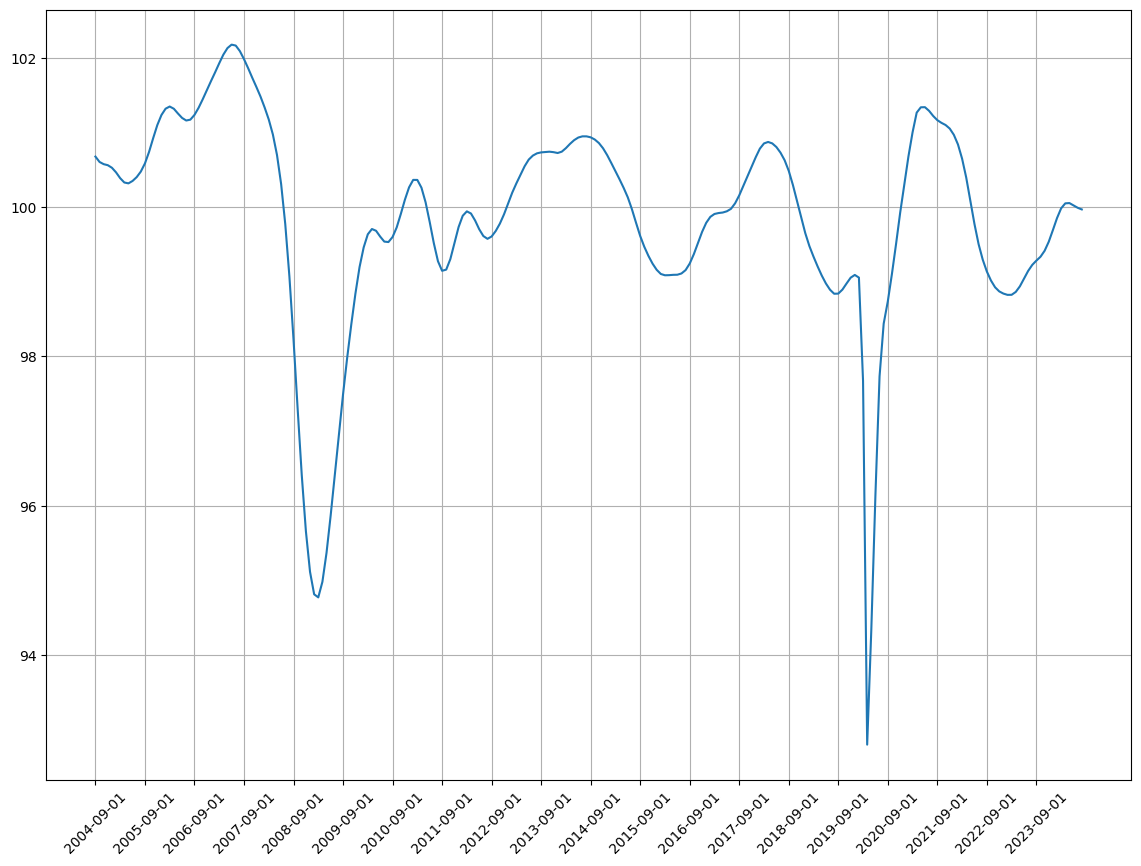

In [13]:
plt.figure(figsize=(14,10))
plt.plot(monthly_df)
plt.xticks(np.arange(0, len(temp), 12), rotation=45)
plt.grid()
plt.show()

In [14]:
import mysql.connector

In [15]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [16]:
cur = remote.cursor()

sql = open("../sql_script/insert_lei.sql").read()
for index, row in monthly_df.iterrows():
    temp = [str(index), float(row["usa_lei"])]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from lei")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', 100.6768]
['2004-10-01', 100.6047]
['2004-11-01', 100.5752]
['2004-12-01', 100.5613]
['2005-01-01', 100.5269]
['2005-02-01', 100.4652]
['2005-03-01', 100.3873]
['2005-04-01', 100.3297]
['2005-05-01', 100.3179]
['2005-06-01', 100.3501]
['2005-07-01', 100.4016]
['2005-08-01', 100.4757]
['2005-09-01', 100.5851]
['2005-10-01', 100.7398]
['2005-11-01', 100.9244]
['2005-12-01', 101.0991]
['2006-01-01', 101.2336]
['2006-02-01', 101.3182]
['2006-03-01', 101.3473]
['2006-04-01', 101.3175]
['2006-05-01', 101.2536]
['2006-06-01', 101.1945]
['2006-07-01', 101.1599]
['2006-08-01', 101.1712]
['2006-09-01', 101.2347]
['2006-10-01', 101.3301]
['2006-11-01', 101.4443]
['2006-12-01', 101.5673]
['2007-01-01', 101.6872]
['2007-02-01', 101.8049]
['2007-03-01', 101.9267]
['2007-04-01', 102.0424]
['2007-05-01', 102.1304]
['2007-06-01', 102.1764]
['2007-07-01', 102.1639]
['2007-08-01', 102.0899]
['2007-09-01', 101.9822]
['2007-10-01', 101.8616]
['2007-11-01', 101.7334]
['2007-12-01', 101.6097]


In [17]:
remote.close()